# 2. Review of Probability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from scipy.stats import t, chi2, f, skew, kurtosis
import seaborn as sns

## Random Variables and probability distributions

In [2]:
data = {
    "Number of Failures": [0, 1, 2, 3, 4],
    "Probability Distribution": [0.8, 0.1, 0.06, 0.03, 0.01],
    "Cumulative Probability": [0.8, 0.9, 0.96, 0.99, 1.0]
}


df = pd.DataFrame(data)
df.set_index("Number of Failures", inplace=True)
df

,Probability Distribution,Cumulative Probability
Number of Failures,,
0,0.80,0.80
1,0.10,0.90
2,0.06,0.96
3,0.03,0.99
4,0.01,1.00


In [3]:
df.transpose()

Number of Failures,0,1,2,3,4
Probability Distribution,0.8,0.1,0.06,0.03,0.01
Cumulative Probability,0.8,0.9,0.96,0.99,1.00


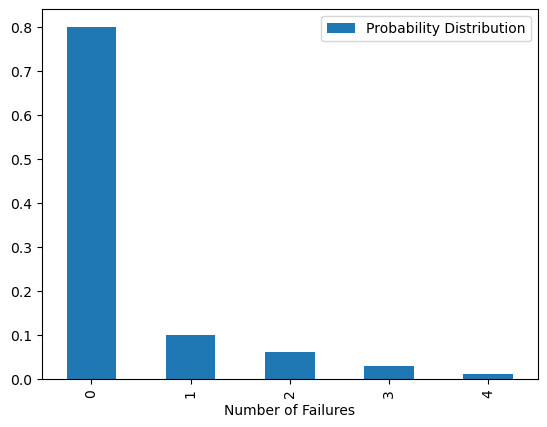

In [4]:
df.plot(y= 'Probability Distribution', kind = 'bar');

In [5]:
x = np.linspace(-5, 5, 1000)  
pdf = norm.pdf(x, 0, 1) 
cdf = norm.cdf(x, 0, 1)  

In [6]:
skew(pdf)

np.float64(1.1108237139164439)

In [7]:
kurtosis(pdf)

np.float64(-0.30739308774220664)

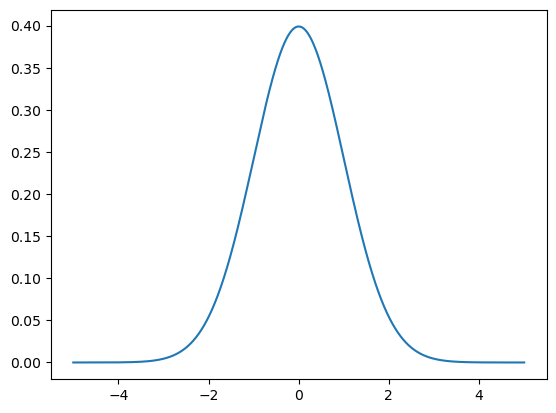

In [8]:
plt.plot(x,pdf);

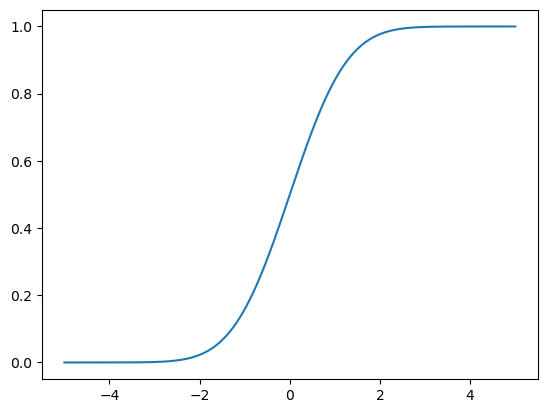

In [9]:
plt.plot(x,cdf);

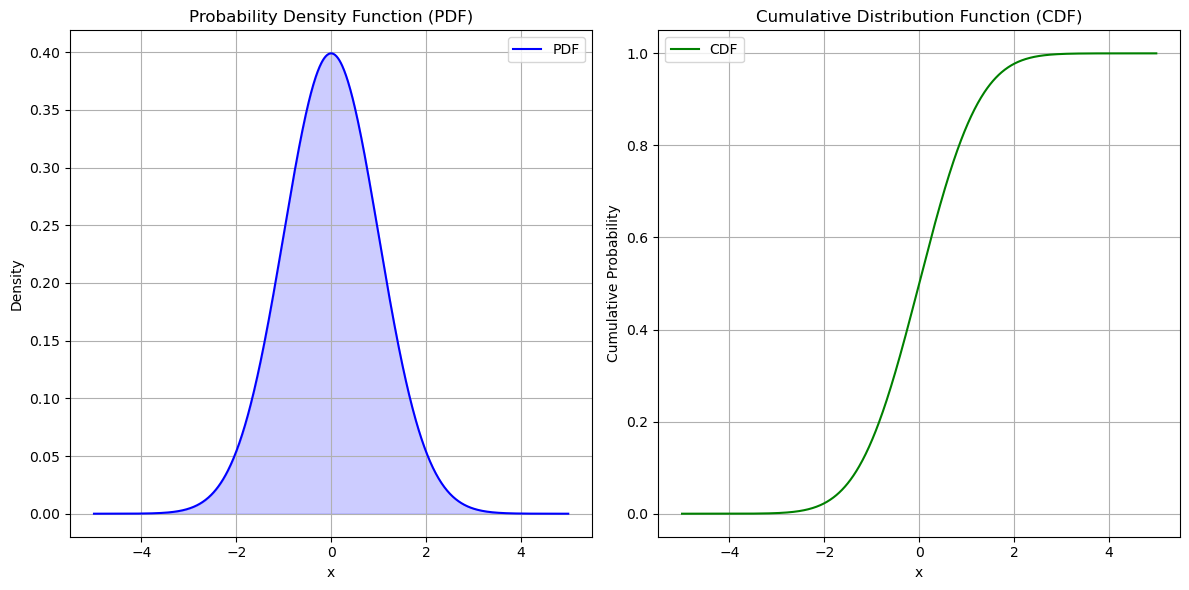

In [10]:
# set figure size
plt.figure(figsize=(12, 6))

# Plot the PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF', color='blue')
plt.fill_between(x, pdf, alpha=0.2, color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF', color='green')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()


## Expected Values, Mean, and Variance

In [11]:
df

,Probability Distribution,Cumulative Probability
Number of Failures,,
0,0.80,0.80
1,0.10,0.90
2,0.06,0.96
3,0.03,0.99
4,0.01,1.00


### Expected value

In [12]:
expected = df["Probability Distribution"].dot(df.index)
expected

np.float64(0.35)

In [13]:
# another way
(df.index * df["Probability Distribution"]).sum()

np.float64(0.35)

In [14]:
# third way
np.sum(df.index * df["Probability Distribution"])

np.float64(0.35)

### Variance 

In [15]:
variance = np.sum((df.index - expected)**2 * df['Probability Distribution'])
variance

np.float64(0.6475000000000001)

In [16]:
# another way
sum(df.index ** 2 * df['Probability Distribution']) - (sum(df.index * df['Probability Distribution'])) ** 2

0.6475000000000001

### Standard deviation

In [17]:
math.sqrt(variance)

0.8046738469715541

## Two Random Variables

In [18]:
data = {
    'Rain (X = 0)': [0.15, 0.15, 0.30],
    'No Rain (X = 1)': [0.07, 0.63, 0.70],
    'Total': [0.22, 0.78, 1.00]
}

index = ['Long commute (Y = 0)', 'Short commute (Y = 1)', 'Total']

df2 = pd.DataFrame(data, index=index)
df2


,Rain (X = 0),No Rain (X = 1),Total
Long commute (Y = 0),0.15,0.07,0.22
Short commute (Y = 1),0.15,0.63,0.78
Total,0.30,0.70,1.00


In [19]:
## Joint distribution
df2.iloc[0,0]

np.float64(0.15)

In [20]:
## Marginal distribution of long commute
df2.iloc[0,2]

np.float64(0.22)

In [21]:
## Conditional distribution of rain (x =0)
df2['Rain (X = 0)'] / df2.loc['Total', 'Rain (X = 0)']

Long commute (Y = 0)     0.5
Short commute (Y = 1)    0.5
Total                    1.0
Name: Rain (X = 0), dtype: float64

In [22]:
data_joint = {
    'M = 0': [0.35, 0.45, 0.80],
    'M = 1': [0.065, 0.035, 0.10],
    'M = 2': [0.05, 0.01, 0.06],
    'M = 3': [0.025, 0.005, 0.03],
    'M = 4': [0.01, 0.00, 0.01],
    'Total': [0.50, 0.50, 1.00]
}

index_joint = ['Old network (A = 0)', 'New network (A = 1)', 'Total']

df_joint = pd.DataFrame(data_joint, index=index_joint)
df_joint

,M = 0,M = 1,M = 2,M = 3,M = 4,Total
Old network (A = 0),0.35,0.065,0.05,0.025,0.01,0.5
New network (A = 1),0.45,0.035,0.01,0.005,0.00,0.5
Total,0.80,0.100,0.06,0.030,0.01,1.0


In [23]:
data_conditional = {
    'M = 0': [0.70, 0.90],
    'M = 1': [0.13, 0.07],
    'M = 2': [0.10, 0.02],
    'M = 3': [0.05, 0.01],
    'M = 4': [0.02, 0.00],
    'Total': [1.00, 1.00]
}

index_conditional = ['Pr(M|A = 0)', 'Pr(M|A = 1)']

df_conditional = pd.DataFrame(data_conditional, index=index_conditional)
df_conditional

,M = 0,M = 1,M = 2,M = 3,M = 4,Total
Pr(M|A = 0),0.7,0.13,0.10,0.05,0.02,1.0
Pr(M|A = 1),0.9,0.07,0.02,0.01,0.00,1.0


In [24]:
# Conditional Expectation
m_values = np.array([0, 1, 2, 3, 4])

E_M_given_A0 = np.sum(m_values * df_conditional.loc['Pr(M|A = 0)'][:-1])
E_M_given_A1 = np.sum(m_values * df_conditional.loc['Pr(M|A = 1)'][:-1])

E_M_given_A0, E_M_given_A1

(np.float64(0.56), np.float64(0.14))

In [25]:
# Law of Iterated Expectation
E_M = np.sum([E_M_given_A0 * df_joint.loc['Old network (A = 0)', 'Total'], E_M_given_A1 * df_joint.loc['New network (A = 1)', 'Total']])
print(f"Expected Value E[M]: {E_M}")

Expected Value E[M]: 0.35000000000000003


In [26]:
# Conditional Variance
Var_M_given_A0 = np.sum((m_values - E_M_given_A0)**2 * df_conditional.loc['Pr(M|A = 0)'][:-1])
Var_M_given_A1 = np.sum((m_values - E_M_given_A1)**2 * df_conditional.loc['Pr(M|A = 1)'][:-1])

Var_M_given_A0, Var_M_given_A1

(np.float64(0.9863999999999999), np.float64(0.22039999999999998))

## The Normal, Chi-Squared, Student t, and F Distributions

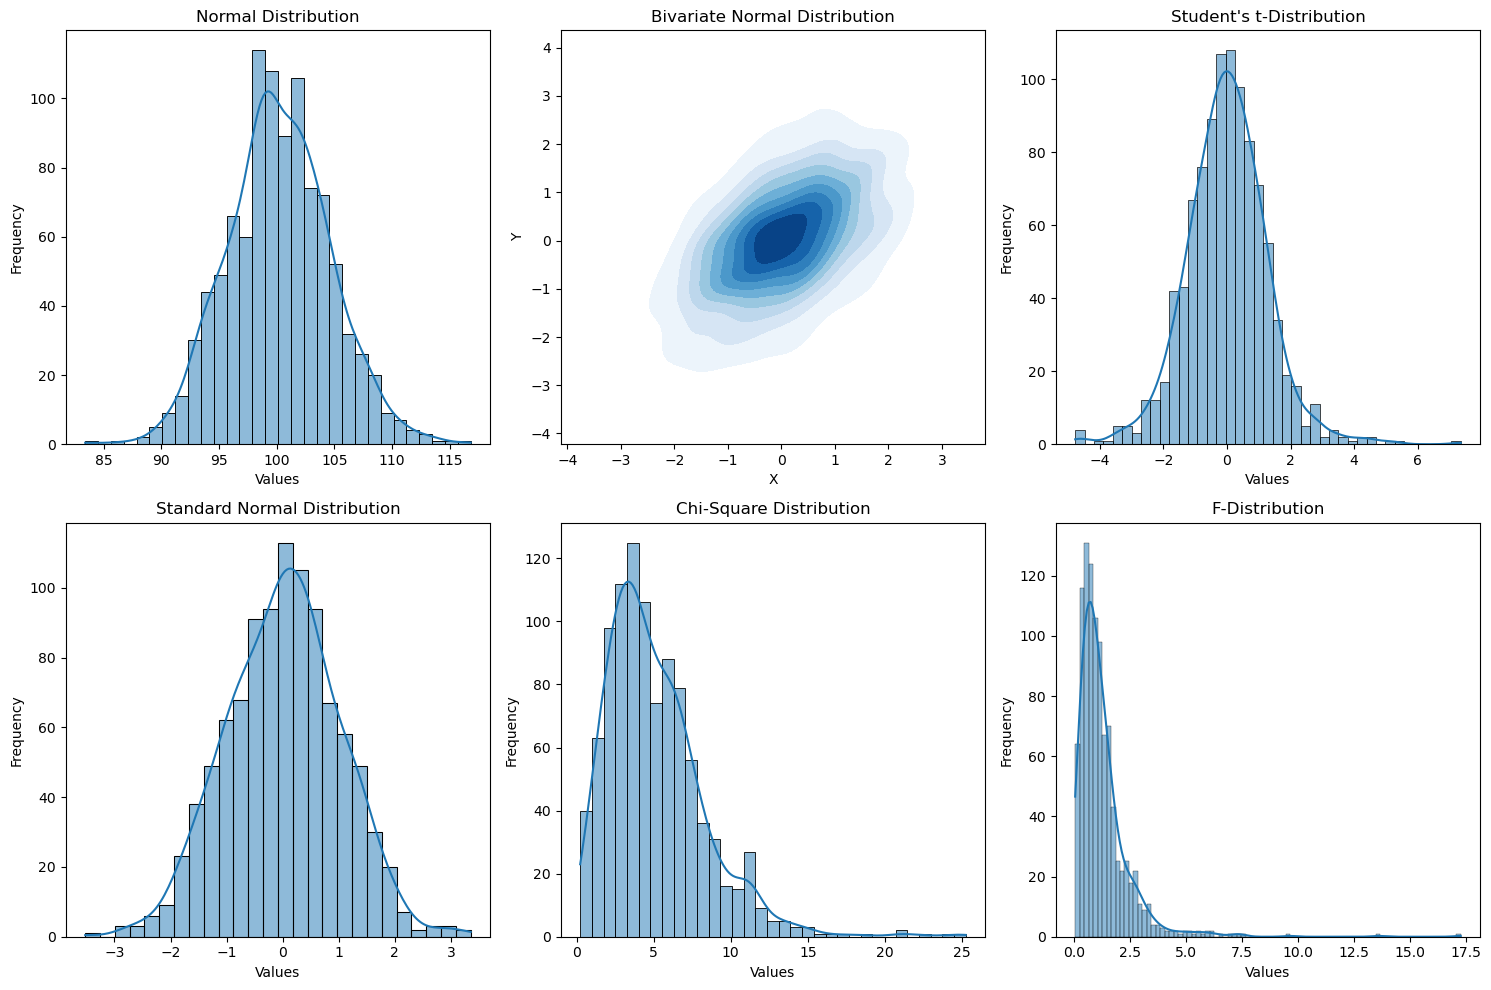

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, t, norm, chi2, f

# Set up figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Generate data for each distribution
# Normal distribution with mean 100 and variance 20
mean_normal = 100
std_dev_normal = np.sqrt(20)
data_normal = np.random.normal(mean_normal, std_dev_normal, 1000)

# Bivariate normal distribution
mean_bivariate = [0, 0]
covariance_bivariate = [[1, 0.5], [0.5, 1]]
data_bivariate = np.random.multivariate_normal(mean_bivariate, covariance_bivariate, 1000)

# Student's t-distribution with degrees of freedom 5
df_t = 5
data_t = np.random.standard_t(df_t, 1000)

# Standard normal distribution (mean 0, variance 1)
data_standard_normal = np.random.standard_normal(1000)

# Chi-square distribution with 5 degrees of freedom
df_chi2 = 5
data_chi2 = np.random.chisquare(df_chi2, 1000)

# F-distribution with degrees of freedom 5 and 10
dfn_f = 5
dfd_f = 10
data_f = np.random.f(dfn_f, dfd_f, 1000)

# Plotting each distribution
sns.histplot(data_normal, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Normal Distribution')
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Frequency')

sns.kdeplot(x=data_bivariate[:, 0], y=data_bivariate[:, 1], ax=axes[0, 1], fill=True, cmap="Blues", thresh=0.05)
axes[0, 1].set_title('Bivariate Normal Distribution')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')

sns.histplot(data_t, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Student's t-Distribution")
axes[0, 2].set_xlabel('Values')
axes[0, 2].set_ylabel('Frequency')

sns.histplot(data_standard_normal, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Standard Normal Distribution')
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(data_chi2, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Chi-Square Distribution')
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(data_f, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('F-Distribution')
axes[1, 2].set_xlabel('Values')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


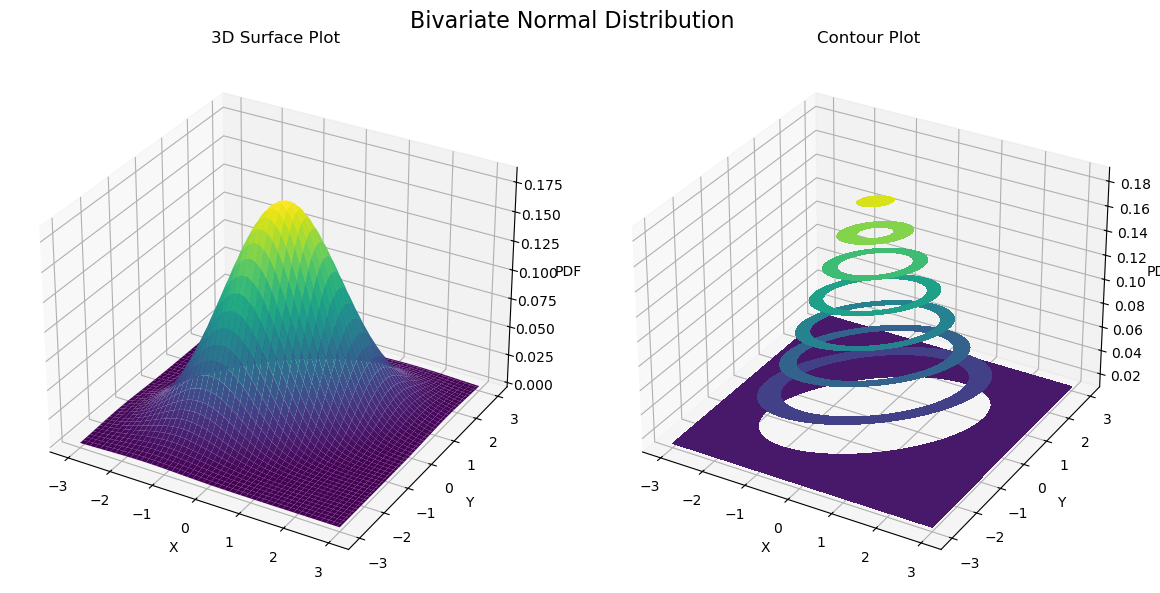

In [28]:

# Parameters for bivariate normal distribution
mean = [0, 0]
covariance = [[1, 0.5], [0.5, 1]]

# Generate grid points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Calculate PDF values
Z = multivariate_normal.pdf(pos, mean, covariance)

# Create figure and 3D axes
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Bivariate Normal Distribution', fontsize=16)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot 3D surface
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title('3D Surface Plot')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('PDF')

# Plot contour plot
ax2.contourf(X, Y, Z, cmap='viridis')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('PDF')

plt.tight_layout()
plt.show()

## Random Sampling and the Distribution of the Sample Average

In [29]:
data = {
    'Numbers': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

df = pd.DataFrame(data)

random_sample = df['Numbers'].sample(n=5, replace=False, random_state=1)
random_sample

2     30
9    100
6     70
4     50
0     10
Name: Numbers, dtype: int64

In [30]:
df.iloc[random_sample.index]

,Numbers
2,30
9,100
6,70
4,50
0,10


## Large-Sample Approximations to Sampling Distributions

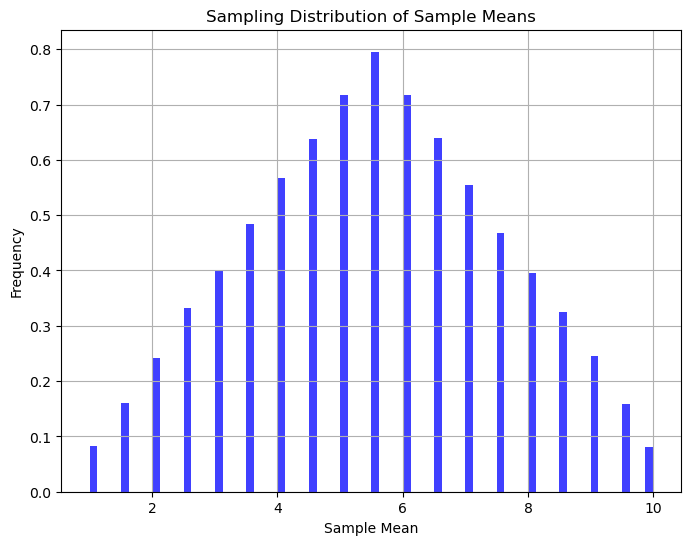

In [31]:
# Generate data from 1 to 10
data = np.arange(1, 11)

# Number of samples to draw
num_samples = 110000

# Initialize an array to store sample means
sample_means = np.zeros(num_samples)

# Perform sampling and compute sample means
for i in range(num_samples):
    # Sample two values from the data with replacement
    sample = np.random.choice(data, size=2, replace=True)
    
    # Compute the sample mean
    sample_mean = np.mean(sample)
    
    # Store the sample mean
    sample_means[i] = sample_mean

# Plotting the sampling distribution
plt.figure(figsize=(8, 6))
sns.histplot(sample_means, stat='density', color='blue', fill=True, linewidth=0)
plt.title('Sampling Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
np.mean(data)

np.float64(5.5)

In [33]:
np.var(data)

np.float64(8.25)

## Exercises

🚧 Under Construction